<a href="https://colab.research.google.com/github/JamilaBibi/IBP-assignment-2/blob/main/_enron_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Downloading Enron Email Data



### Full/Complete Dataset

The following code-cell will download the complete Enron email database to the Colab instance.  It will take about 1-2 mins to download.

In [11]:
!wget -O enron.db https://curtin-my.sharepoint.com/:u:/g/personal/211934g_curtin_edu_au/EaYagsqa2r1Bi5wtHbswGFwBH2kd2uTnz6rlka7GI36GUQ?download=1

--2023-05-23 09:46:30--  https://curtin-my.sharepoint.com/:u:/g/personal/211934g_curtin_edu_au/EaYagsqa2r1Bi5wtHbswGFwBH2kd2uTnz6rlka7GI36GUQ?download=1
Resolving curtin-my.sharepoint.com (curtin-my.sharepoint.com)... 13.107.136.8, 13.107.138.8, 2620:1ec:8f8::8, ...
Connecting to curtin-my.sharepoint.com (curtin-my.sharepoint.com)|13.107.136.8|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /personal/211934g_curtin_edu_au/Documents/Teaching/ISYS2001/ISYS2001-Assignment-2-Data/enron_sqlite3.db?ga=1 [following]
--2023-05-23 09:46:31--  https://curtin-my.sharepoint.com/personal/211934g_curtin_edu_au/Documents/Teaching/ISYS2001/ISYS2001-Assignment-2-Data/enron_sqlite3.db?ga=1
Reusing existing connection to curtin-my.sharepoint.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 853819392 (814M) [application/octet-stream]
Saving to: ‘enron.db’

enron.db            100%[===================>] 814.27M  48.5MB/s    in 22s     

2023-05-23 09:46:54 (36.

In [12]:
import sqlite3

In [13]:
conn = sqlite3.connect("enron.db")

In [14]:
cur = conn.cursor()

**Check schema of database**

In [15]:
sql="""
SELECT name
FROM sqlite_master
WHERE type='table';
"""

cur.execute(sql)
cur.fetchall()

[('employeelist',), ('message',), ('recipientinfo',), ('referenceinfo',)]

**Check schema of tables**

In [16]:
#Check Schema of table employeelist using PRAGMA
sql="""
PRAGMA table_info('employeelist');
"""

cur.execute(sql)
cur.fetchall()

[(0, 'eid', 'INTEGER', 1, None, 1),
 (1, 'firstName', 'VARCHAR(31)', 1, "''", 0),
 (2, 'lastName', 'VARCHAR(31)', 1, "''", 0),
 (3, 'Email_id', 'VARCHAR(31)', 1, "''", 0),
 (4, 'Email2', 'VARCHAR(31)', 0, None, 0),
 (5, 'Email3', 'VARCHAR(31)', 0, None, 0),
 (6, 'EMail4', 'VARCHAR(31)', 0, None, 0),
 (7, 'folder', 'VARCHAR(31)', 1, "''", 0),
 (8, 'status', 'VARCHAR(50)', 0, None, 0)]

In [17]:
#Check Schema of table message using PRAGMA
sql="""
PRAGMA table_info('message');
"""

cur.execute(sql)
cur.fetchall()

[(0, 'mid', 'INTEGER', 1, "'0'", 1),
 (1, 'sender', 'VARCHAR(127)', 1, "''", 0),
 (2, 'date', 'DATETIME', 0, None, 0),
 (3, 'message_id', 'VARCHAR(127)', 0, None, 0),
 (4, 'subject', 'TEXT', 0, None, 0),
 (5, 'body', 'TEXT', 0, None, 0),
 (6, 'folder', 'VARCHAR(127)', 1, "''", 0)]

In [18]:
#Check Schema of table recipientinfo using PRAGMA
sql="""
PRAGMA table_info('recipientinfo');
"""

cur.execute(sql)
cur.fetchall()

[(0, 'rid', 'INTEGER', 1, "'0'", 1),
 (1, 'mid', 'INTEGER', 1, "'0'", 0),
 (2, 'rtype', 'TEXT', 0, None, 0),
 (3, 'rvalue', 'VARCHAR(127)', 0, None, 0),
 (4, 'dater', 'DATETIME', 0, None, 0)]

In [19]:
#Check Schema of table referenceinfo using PRAGMA
sql="""
PRAGMA table_info('referenceinfo');
"""

cur.execute(sql)
cur.fetchall()

[(0, 'rfid', 'INTEGER', 1, "'0'", 1),
 (1, 'mid', 'INTEGER', 1, "'0'", 0),
 (2, 'reference', 'TEXT', 0, None, 0)]

**Data Manipulation**

# Email Traffic overtime

In [20]:
#Check whether the data column in Message contain null values
sql= """
SELECT date
FROM message
"""



In [33]:
#convert to dataframe
import pandas as pd
message_df = pd.read_sql_query(sql,conn)
message_df

,date,count
0,0001/30,2
1,0001/18,1
2,0001/24,1
3,0001/01,1
4,0001/06,1
...,...,...
194082,2020/29,1
194083,2043/28,1
194084,2044/02,1
194085,2044/04,1


In [40]:
#sql query to count number of emails per day
sql="""

SELECT strftime('%Y-%m-%d', date) 
AS date,
COUNT(*) AS count FROM message 
GROUP BY date

"""
#convert in dataframe
messageperday_df = pd.read_sql_query(sql, conn)
messageperday_df

,date,count
0,0001-05-30,2
1,0001-06-18,1
2,0001-07-24,1
3,0001-08-01,1
4,0001-08-06,1
...,...,...
194082,2020-12-29,1
194083,2043-12-28,1
194084,2044-01-02,1
194085,2044-01-04,1


<Axes: xlabel='date', ylabel='count'>

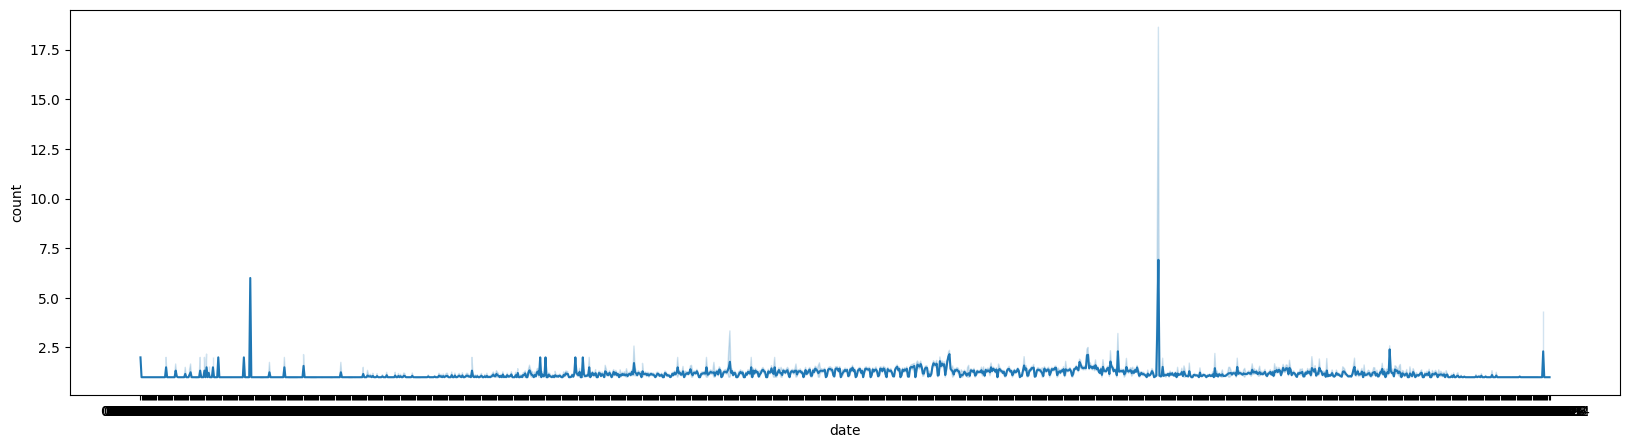

In [41]:
#Plot line graph for emails per day
#using seaborn and matplotlib to perform visualisation of data
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.subplots(figsize=(20,5))
sns.lineplot(x= 'date', y='count', data= messageperday_df)




In [34]:
##sql query to count number of emails per week
sql="""

SELECT strftime('%Y-%m-%w', date) 
AS date,
COUNT(*) AS count FROM message 
GROUP by date


"""
#convert in dataframe
messageperweek_df = pd.read_sql_query(sql, conn)
messageperweek_df

,date,count
0,0001-05-3,2
1,0001-06-1,1
2,0001-07-2,1
3,0001-08-3,1
4,0001-08-1,1
...,...,...
194082,2020-12-2,1
194083,2043-12-1,1
194084,2044-01-6,1
194085,2044-01-1,1


<Axes: xlabel='date', ylabel='count'>

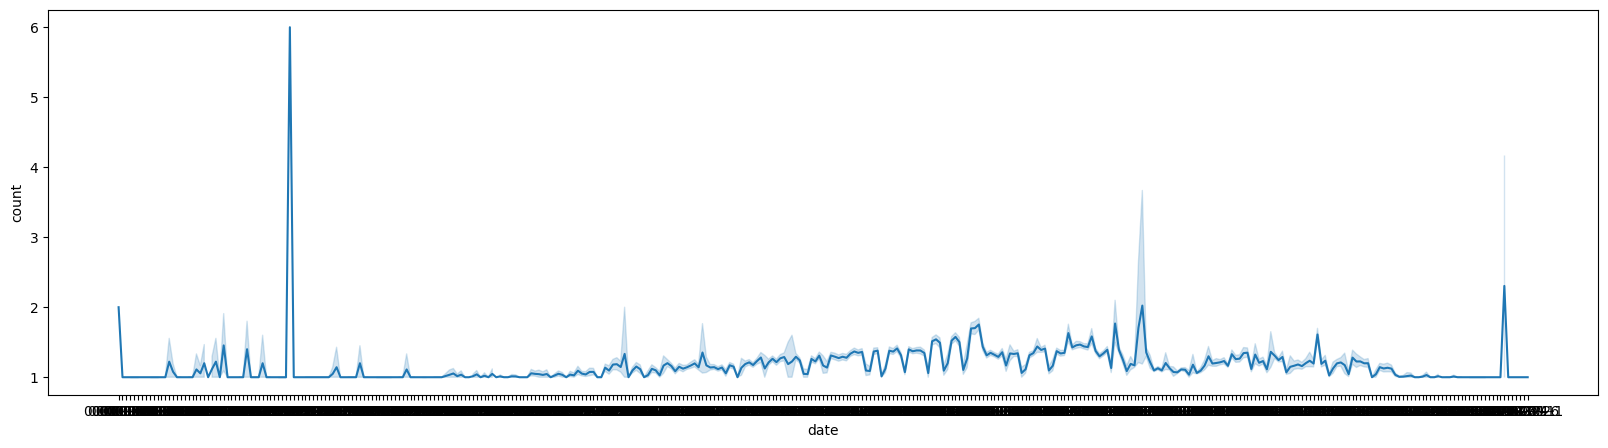

In [38]:
#Plot line graph for emails per week
#using seaborn and matplotlib to perform visualisation of data
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.subplots(figsize=(20,5))
sns.lineplot(x= 'date', y='count', data= messageperweek_df)

In [37]:
##sql query to count number of emails per month
sql="""

SELECT strftime('%Y-%m', date) 
AS date,
COUNT(*) AS count FROM message 
GROUP by date


"""
#convert in dataframe
messagepermonth_df = pd.read_sql_query(sql, conn)
messagepermonth_df


,date,count
0,0001-05,2
1,0001-06,1
2,0001-07,1
3,0001-08,1
4,0001-08,1
...,...,...
194082,2020-12,1
194083,2043-12,1
194084,2044-01,1
194085,2044-01,1


<Axes: xlabel='date', ylabel='count'>

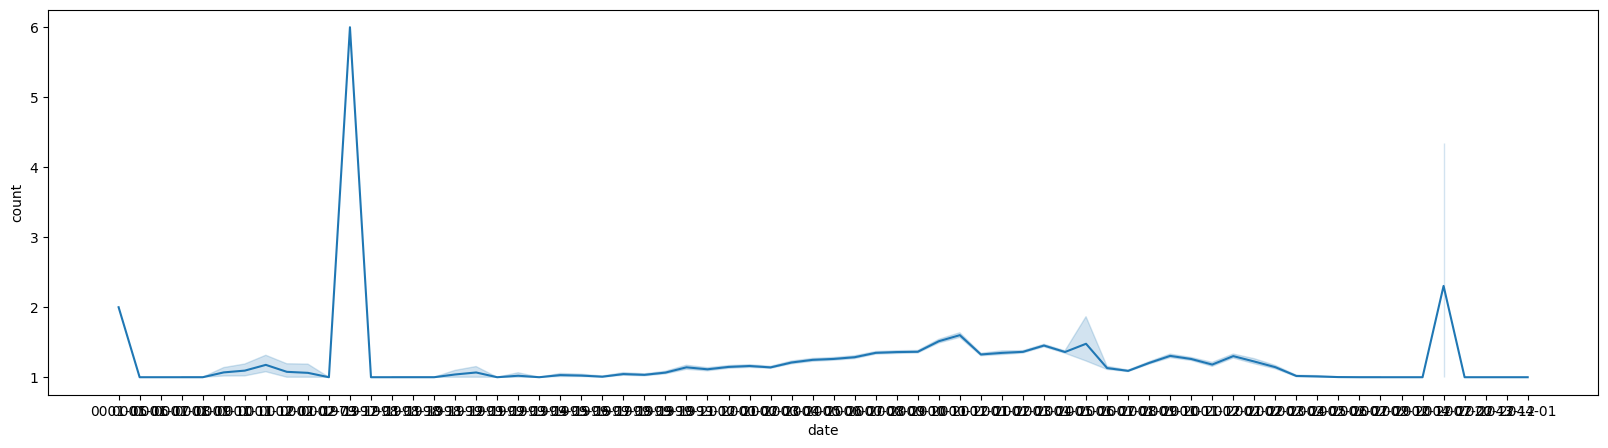

In [39]:
#Plot line graph for emails per month
#using seaborn and matplotlib to perform visualisation of data
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.subplots(figsize=(20,5))
sns.lineplot(x= 'date', y='count', data= messagepermonth_df)

In [ ]:
#import seaborn
#import matplotlib
#use subplot to set size of figure
#use lineplot to plot graph

# SQLite3 Support Tools

Some tools to inspect the database (*Not needed for assignment*)

* [DB Browser for SQLite3](https://sqlitebrowser.org/)
* [SQLiteStudio](https://sqlitestudio.pl/)